In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, layers


In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
X_train.shape

## 3d array : 60000 images and each image is of 28*28

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

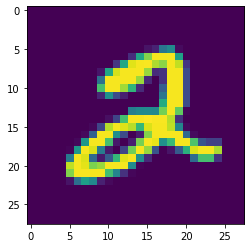

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [9]:
## lets normalize the values

X_train = X_train/255
X_test = X_test/255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train.shape

## its in 2d , we need to bring it in a 1D array
## that is we will need to flatten it

(60000, 28, 28)

In [15]:
model = Sequential()
model.add(layers.Flatten(input_shape = (28,28)))
model.add(layers.Dense(128,activation ='relu')) 
## here no need to mention anything regarding the input numbers
## since flattens output is been given to dense

model.add(layers.Dense(30,activation ='relu')) 

## whenever more than one node in the classification, you will use softmax function
model.add(layers.Dense(10,activation ='softmax')) 



In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3870      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 104,660
Trainable params: 104,660
Non-trainable params: 0
_________________________________________________________________


In [17]:
## whats the difference between sparse_categorical_crossentropy and just categorical_crossentropy
## in this you dont need to label your target variable into one-hot-encoding


model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 7s 143us/sample - loss: 0.2793 - accuracy: 0.9190 - val_loss: 0.1477 - val_accuracy: 0.9573
Epoch 2/25
48000/48000 [==============================] - 6s 122us/sample - loss: 0.1221 - accuracy: 0.9632 - val_loss: 0.1203 - val_accuracy: 0.9661
Epoch 3/25
48000/48000 [==============================] - 5s 108us/sample - loss: 0.0837 - accuracy: 0.9745 - val_loss: 0.1111 - val_accuracy: 0.9661
Epoch 4/25
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0628 - accuracy: 0.9804 - val_loss: 0.1014 - val_accuracy: 0.9706
Epoch 5/25
48000/48000 [==============================] - 5s 111us/sample - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0898 - val_accuracy: 0.9737
Epoch 6/25
48000/48000 [==============================] - 6s 115us/sample - loss: 0.0393 - accuracy: 0.9872 - val_loss: 0.0917 - val_accuracy: 0.9749
Epoch 7/25
48000/48000 [==========================

In [21]:
y_pred = model.predict(X_test)
## will give the probability of the same
## so we need to get the number which has maximum value

y_pred = y_pred.argmax(axis=1)

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9796

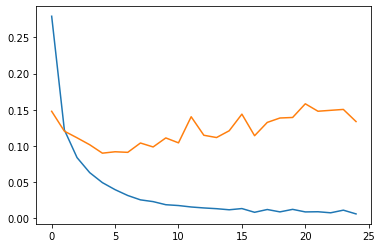

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

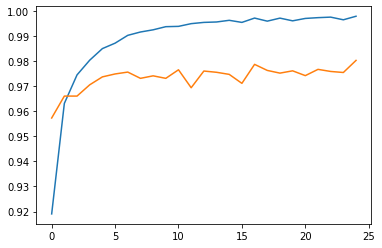

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

2


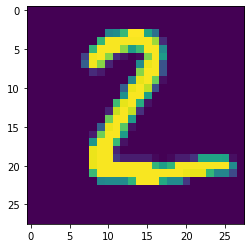

In [27]:
plt.imshow(X_test[1])

print(y_pred[1])

## our model predicted correctly

In [30]:
## prediction model

## we need to reshape the image
## so single image which is 28*28 : so (1,28,28)
model.predict(X_test[0].reshape(1,28,28)).argmax()

7